In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr

## 1. 前导知识学习

In [2]:
data = pdr.get_data_yahoo('BABA',start = '2010-01-01', end = '2017-06-30')
print(data.head())

                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2014-09-19  99.699997  89.949997  92.699997  93.889999  271879400  93.889999
2014-09-22  92.949997  89.500000  92.699997  89.889999   66657800  89.889999
2014-09-23  90.480003  86.620003  88.940002  87.169998   39009800  87.169998
2014-09-24  90.570000  87.220001  88.470001  90.570000   32088000  90.570000
2014-09-25  91.500000  88.500000  91.089996  88.919998   28598000  88.919998


#### 补充：这里补充一点更改列名的知识

In [4]:
data.rename(columns = {'Adj Close':'price'},inplace = True)   #对dataframe重命名采用的是一种字典结构
data.info()  #直接就可以看到修改后的所有列名了

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 701 entries, 2014-09-19 to 2017-06-30
Data columns (total 6 columns):
High      701 non-null float64
Low       701 non-null float64
Open      701 non-null float64
Close     701 non-null float64
Volume    701 non-null int64
price     701 non-null float64
dtypes: float64(5), int64(1)
memory usage: 38.3 KB


#### 继续回来

In [5]:
data['SMA_20'] = data['Close'].rolling(20).mean()  #用20天的数据算平均

In [6]:
#我们还可以用data['SMA_20_std'] = data['Close'].rolling(20).std()  那么算的是这20天的移动的标准差，后面是可以进行更改的。

In [7]:
data['SMA_60'] = data['Close'].rolling(60).mean()  #用60天的数据算平均
print(data.head())  #我们如果看具体数据会看到，最开始都是空值。因为如果我们算20MA，那么必须先有20天数据，那么前19天是没有数据的。而对于60MA，那么前59天是没有数据的。
print(data.tail())  #但是我们如果看屁股后面的那么就会发现数据都是有的。

                 High        Low       Open      Close     Volume      price  \
Date                                                                           
2014-09-19  99.699997  89.949997  92.699997  93.889999  271879400  93.889999   
2014-09-22  92.949997  89.500000  92.699997  89.889999   66657800  89.889999   
2014-09-23  90.480003  86.620003  88.940002  87.169998   39009800  87.169998   
2014-09-24  90.570000  87.220001  88.470001  90.570000   32088000  90.570000   
2014-09-25  91.500000  88.500000  91.089996  88.919998   28598000  88.919998   

            SMA_20  SMA_60  
Date                        
2014-09-19     NaN     NaN  
2014-09-22     NaN     NaN  
2014-09-23     NaN     NaN  
2014-09-24     NaN     NaN  
2014-09-25     NaN     NaN  
                  High         Low        Open       Close    Volume  \
Date                                                                   
2017-06-26  145.360001  141.270004  144.029999  142.729996  17828100   
2017-06-27  144.3800

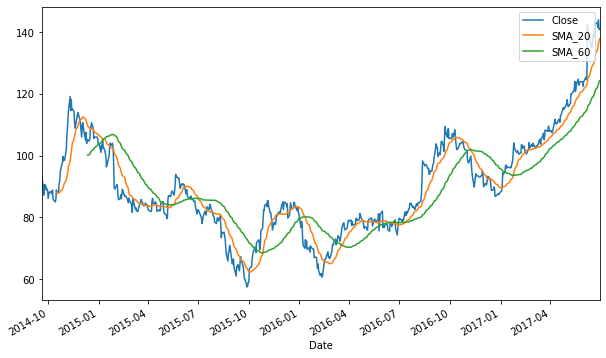

In [8]:
data[['Close','SMA_20','SMA_60']].plot(figsize = (10,6))
plt.legend(loc = 'upper right')  #这样子确定legend位置
plt.show()  #我们可以看到最后一段时间其实有一个golden cross，那么其实是觉得应该买入的，这个其实是和yahoo里面的analyst recommendation是一致的。

#### 计算股票return（这里我们算的是连续的return）

In [9]:
data['return'] = np.log(data['Close']/data['Close'].shift(1))  
#我们这里把前面的累计求和，那么才是我们这一段时间内的持有收益。这里我们求得是连续的return
data

,High,Low,Open,Close,Volume,price,SMA_20,SMA_60,return
Date,,,,,,,,,
2014-09-19,99.699997,89.949997,92.699997,93.889999,271879400,93.889999,NaN,NaN,NaN
2014-09-22,92.949997,89.500000,92.699997,89.889999,66657800,89.889999,NaN,NaN,-0.043537
2014-09-23,90.480003,86.620003,88.940002,87.169998,39009800,87.169998,NaN,NaN,-0.030726
2014-09-24,90.570000,87.220001,88.470001,90.570000,32088000,90.570000,NaN,NaN,0.038263
2014-09-25,91.500000,88.500000,91.089996,88.919998,28598000,88.919998,NaN,NaN,-0.018386
...,...,...,...,...,...,...,...,...,...
2017-06-26,145.360001,141.270004,144.029999,142.729996,17828100,142.729996,134.166500,121.993333,-0.001960
2017-06-27,144.380005,141.100006,143.899994,141.529999,17374800,141.529999,135.047500,122.555000,-0.008443
2017-06-28,144.369995,141.479996,142.649994,143.949997,17759800,143.949997,136.122000,123.152667,0.016954


#### 股票每一天的收益的算法：
#### ①离散：今天股票价格除以上一天股票价格 - 1
#### ②连续：ln(Pt/P-1)也就是今天股票价格除以上一天股票价格取对数

In [10]:
#如果我们这里是离散型的return，有两种方法：
data['returns_dis'] = data['Close']/data['Close'].shift(1) - 1
data['returns_dis_'] = data['Close'].pct_change() #算出收盘价每天百分比的变动
print(data.head())

                 High        Low       Open      Close     Volume      price  \
Date                                                                           
2014-09-19  99.699997  89.949997  92.699997  93.889999  271879400  93.889999   
2014-09-22  92.949997  89.500000  92.699997  89.889999   66657800  89.889999   
2014-09-23  90.480003  86.620003  88.940002  87.169998   39009800  87.169998   
2014-09-24  90.570000  87.220001  88.470001  90.570000   32088000  90.570000   
2014-09-25  91.500000  88.500000  91.089996  88.919998   28598000  88.919998   

            SMA_20  SMA_60    return  returns_dis  returns_dis_  
Date                                                             
2014-09-19     NaN     NaN       NaN          NaN           NaN  
2014-09-22     NaN     NaN -0.043537    -0.042603     -0.042603  
2014-09-23     NaN     NaN -0.030726    -0.030259     -0.030259  
2014-09-24     NaN     NaN  0.038263     0.039004      0.039004  
2014-09-25     NaN     NaN -0.018386    -0.

#### 找golden cross和death cross

In [11]:
data['position'] = np.where(data['SMA_20'] > data['SMA_60'],1,-1)  
#找出golden cross，也就是仓位信号，如果信号是1那么就做多，如果信号是-1那么就做空
#上面弄+1和-1的逻辑就是，如果是golden cross那么就return原本就是正的，那么就可以算出正的return。而如果是death cross，return是负的，那么这里我们取-1，就是负负得正，最后呈现的return还是正的
print(data.head())

                 High        Low       Open      Close     Volume      price  \
Date                                                                           
2014-09-19  99.699997  89.949997  92.699997  93.889999  271879400  93.889999   
2014-09-22  92.949997  89.500000  92.699997  89.889999   66657800  89.889999   
2014-09-23  90.480003  86.620003  88.940002  87.169998   39009800  87.169998   
2014-09-24  90.570000  87.220001  88.470001  90.570000   32088000  90.570000   
2014-09-25  91.500000  88.500000  91.089996  88.919998   28598000  88.919998   

            SMA_20  SMA_60    return  returns_dis  returns_dis_  position  
Date                                                                       
2014-09-19     NaN     NaN       NaN          NaN           NaN        -1  
2014-09-22     NaN     NaN -0.043537    -0.042603     -0.042603        -1  
2014-09-23     NaN     NaN -0.030726    -0.030259     -0.030259        -1  
2014-09-24     NaN     NaN  0.038263     0.039004      0.03

#### 绘图

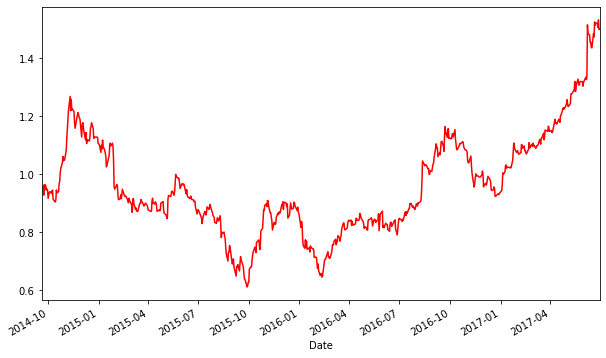

In [12]:
plt.figure()
data['return'].cumsum().apply(np.exp).plot(color = 'r',figsize = (10,6)) #计算累计收益并且可视化，这是连续下的算法
#这里的cumsum其实就是把前面所有的ln(Pt/P-1)全部加起来
#apply其实就使得我前面所有加和然后取自然底数e
plt.show()

## 2.策略开发思路

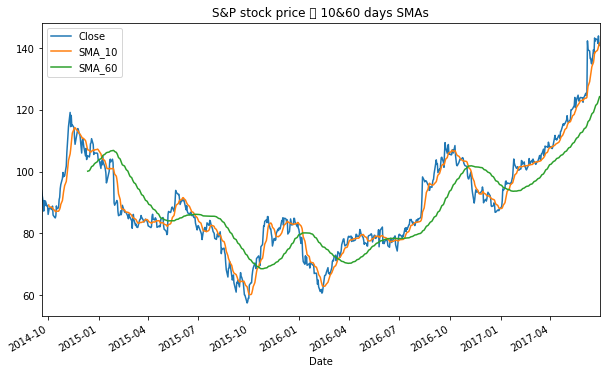

In [14]:
data['SMA_10'] = data['Close'].rolling(10).mean()
data['SMA_60'] = data['Close'].rolling(60).mean()
data[['Close','SMA_10','SMA_60']].plot(title = 'S&P stock price 丨 10&60 days SMAs',figsize = (10,6))  
#pandas里面如何选择多列是必须要掌握的,而且一定要注意的是选取列一定是两个括号
plt.show()

In [15]:
data['position'] = np.where(data['SMA_10'] > data['SMA_60'],1,-1)
data.dropna(inplace = True)  #去掉空值NaN
data.info()
print(data.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 642 entries, 2014-12-12 to 2017-06-30
Data columns (total 13 columns):
High            642 non-null float64
Low             642 non-null float64
Open            642 non-null float64
Close           642 non-null float64
Volume          642 non-null int64
price           642 non-null float64
SMA_20          642 non-null float64
SMA_60          642 non-null float64
return          642 non-null float64
returns_dis     642 non-null float64
returns_dis_    642 non-null float64
position        642 non-null int32
SMA_10          642 non-null float64
dtypes: float64(11), int32(1), int64(1)
memory usage: 67.7 KB
                  High         Low        Open       Close    Volume  \
Date                                                                   
2017-06-26  145.360001  141.270004  144.029999  142.729996  17828100   
2017-06-27  144.380005  141.100006  143.899994  141.529999  17374800   
2017-06-28  144.369995  141.479996  142.649994  1

                  High         Low        Open       Close    Volume  \
Date                                                                   
2014-12-12  107.449997  104.179001  104.699997  105.110001  14537600   
2014-12-15  107.769997  103.699997  106.389999  104.699997  16521800   
2014-12-16  107.680000  103.699997  103.750000  105.769997  21700600   
2014-12-17  109.190002  106.279999  107.110001  109.019997  17311100   
2014-12-18  111.199997  108.260002  110.580002  109.250000  22788100   

                 price      SMA_20      SMA_60    return  returns_dis  \
Date                                                                    
2014-12-12  105.110001  109.566500  100.099666  0.001333     0.001334   
2014-12-15  104.699997  109.046500  100.279833 -0.003908    -0.003901   
2014-12-16  105.769997  108.622499  100.544499  0.010168     0.010220   
2014-12-17  109.019997  108.532999  100.908666  0.030264     0.030727   
2014-12-18  109.250000  108.554499  101.219999  0.002108 

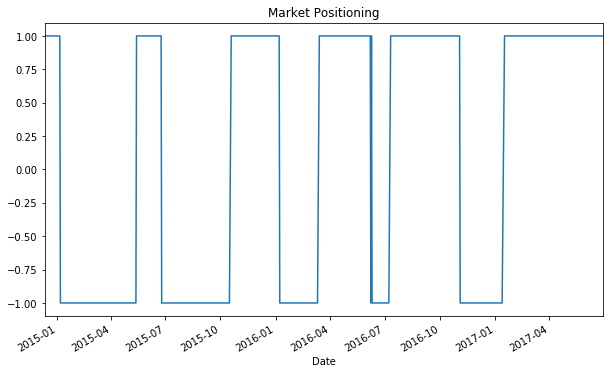

In [16]:
plt.figure()
data['position'].plot(ylim=[-1.1,1.1],title = 'Market Positioning',figsize = (10,6))  
#这里我们知道position就是-1到1，所以我们这里把y轴的取值范围设定为-1.1到1.1
#呈现的图其实就是这么多年来我们有多少次交易，原本是1然后变成-1那么就做空，持有一段时间后又变成1然后就是做多了，再持有一段时间又变成-1
#也就是说，根据上面这张图，我们知道哪些时候我们是做多的，哪些时候我们是做空的
print(data.head())
plt.show()

## 3.计算策略年化收益并可视化

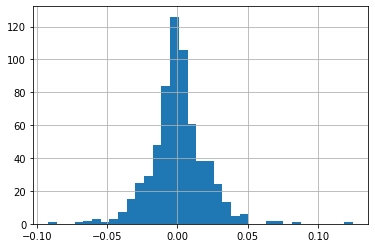

In [17]:
plt.figure()
data['return'].hist(bins = 35)  #将return绘制成直方图,我们发现这个图有一点负偏。绝大多数的金融资产其实都是负偏的，也就是极端负值比较大。
plt.show()

In [18]:
#现在我们要计算这个策略的收益。其实前面算的是S&P这一个指数的收益，其实可以看做是买入并持有，买入后并看看持有这么久之后有多少收益
data['strategy'] = data['position'].shift(1)*data['return']  
#策略的收益：当做多的时候，那么和股票指数额收益一致，但是做空的话就相反（这里的理解其实就是，我们其实无论如何都是赚钱的，因为在行情好的时候，我们做多是赚钱的，而行情差的时候，我们做空这样子其实也是赚钱的）
#未来函数一般会使得我们收益高估
print(data[['return','strategy']].sum())
#也就是说，如果我们这些年只是买入并持有S&P，那么这些年里我们总的持有收益只有29%，而如果我们采用双均线策略的话，那么我们的收益是有72%的

return      0.294376
strategy    0.721803
dtype: float64


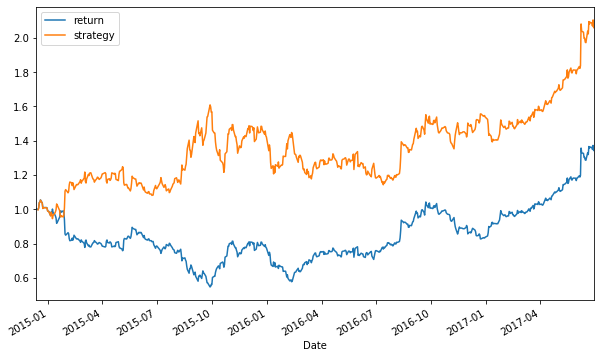

In [19]:
data[['return','strategy']].cumsum().apply(np.exp).plot(figsize = (10,6))
plt.show()  #我们可以看出其实我们的双均线战略是可以跑赢大盘的。注意这里是连续的情况，才能用cumsum
#这张图其实就很贴切我们前面说的双均线策略是低胜率，高收益，胜率不一定很高，但是每一波的大趋势我们都是可以抓住的。

## 4.策略收益风险评估

In [20]:
print(data[['return','strategy']].mean() * 252)   #年化收益率
#return      0.115549   普通持有并且买入的收益率能够有11%
#strategy    0.283767   双均线策略的收益率能有28%

return      0.115549
strategy    0.283767
dtype: float64


In [21]:
print(data[['return','strategy']].std()* 252 ** 0.2)  #年化风险

return      0.059531
strategy    0.059496
dtype: float64


#### 我们发现两种方式的风险其实都是差不多的，但是双均线策略的收益比较高，那么其实就比较好
#### 我们要注意，这里求年化标准差的252是不能直接乘的，而是应该252开方，然后合并到标准差中去

### 接下来我们要计算最大回测

                  High         Low        Open       Close    Volume  \
Date                                                                   
2017-06-26  145.360001  141.270004  144.029999  142.729996  17828100   
2017-06-27  144.380005  141.100006  143.899994  141.529999  17374800   
2017-06-28  144.369995  141.479996  142.649994  143.949997  17759800   
2017-06-29  143.559998  137.520004  143.160004  140.809998  24130300   
2017-06-30  142.380005  139.919998  141.029999  140.899994  12276700   

                 price      SMA_20      SMA_60    return  returns_dis  \
Date                                                                    
2017-06-26  142.729996  134.166500  121.993333 -0.001960    -0.001958   
2017-06-27  141.529999  135.047500  122.555000 -0.008443    -0.008407   
2017-06-28  143.949997  136.122000  123.152667  0.016954     0.017099   
2017-06-29  140.809998  136.964000  123.707500 -0.022055    -0.021813   
2017-06-30  140.899994  137.802499  124.265166  0.000639 

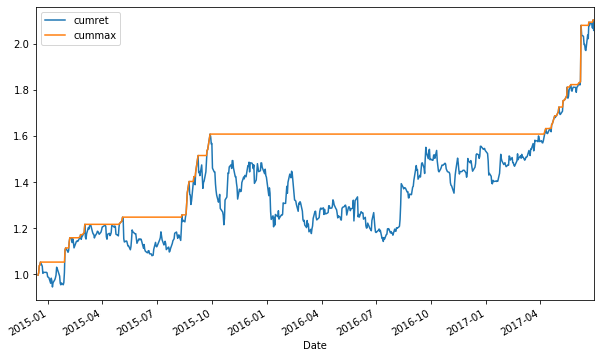

In [22]:
data['cumret'] = data['strategy'].cumsum().apply(np.exp)  #我们先算这个策略的累计收益
data['cummax'] = data['cumret'].cummax()   #cummax就是累计求和里面的最大值,我们算cummax就是为了之后去测drawdown
print(data.tail())
data[['cumret','cummax']].plot(figsize = (10,6))
plt.show()

In [23]:
drawdown = (data['cummax'] - data['cumret'])   #计算最大回测
print(drawdown.max())

0.465539280454061


### 测最大回测的持续时间

In [24]:
temp = drawdown[drawdown == 0]  #drawdown = 0就是累计收益和累计收益的最大值是重合的，说明在这段时间内，几乎每一天都在创新高

In [25]:
#算出temp之后，我们就可以算出每一段temp的时间段算出来
periods = (temp.index[1:] - temp.index[:-1])  #这其实就是我们最开始有一个高点，然后开始回测，回测完了，再创新高期间爬到和我上一个高点一样位置的时间段

In [26]:
#如果这里periods不好理解，那么可以这样子看
print(temp.head(10))  #这里temp打印出来的date其实就是两个高点出现的时间，那么我们如果要看第一段那么就是后一天减去前一天

Date
2014-12-15    0.0
2014-12-16    0.0
2014-12-17    0.0
2014-12-18    0.0
2014-12-19    0.0
2015-01-29    0.0
2015-01-30    0.0
2015-02-05    0.0
2015-02-06    0.0
2015-02-23    0.0
dtype: float64


In [27]:
print(temp.index[1:])  #这里我们从index = 1开始，那么其实就直接忽略了第一个数字
print(temp.index[:-1])  #这里截止到index = -1，那么就忽略了最后一天的日期
print(periods)

DatetimeIndex(['2014-12-16', '2014-12-17', '2014-12-18', '2014-12-19',
               '2015-01-29', '2015-01-30', '2015-02-05', '2015-02-06',
               '2015-02-23', '2015-02-24', '2015-03-02', '2015-03-03',
               '2015-04-30', '2015-05-01', '2015-05-04', '2015-05-05',
               '2015-08-12', '2015-08-19', '2015-08-20', '2015-08-21',
               '2015-08-24', '2015-09-01', '2015-09-04', '2015-09-08',
               '2015-09-23', '2015-09-24', '2015-09-25', '2015-09-28',
               '2017-04-10', '2017-04-17', '2017-04-20', '2017-04-21',
               '2017-04-24', '2017-04-25', '2017-04-28', '2017-05-01',
               '2017-05-02', '2017-05-09', '2017-05-11', '2017-05-12',
               '2017-05-15', '2017-05-16', '2017-05-22', '2017-06-05',
               '2017-06-07', '2017-06-08', '2017-06-21', '2017-06-28'],
              dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2014-12-15', '2014-12-16', '2014-12-17', '2014-12-18',
              

## 5.策略优化的一种思路

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr

In [29]:
data = pdr.get_data_yahoo('BABA',start = '2010-01-01', end = '2017-06-30')
print(data.head())

                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2014-09-19  99.699997  89.949997  92.699997  93.889999  271879400  93.889999
2014-09-22  92.949997  89.500000  92.699997  89.889999   66657800  89.889999
2014-09-23  90.480003  86.620003  88.940002  87.169998   39009800  87.169998
2014-09-24  90.570000  87.220001  88.470001  90.570000   32088000  90.570000
2014-09-25  91.500000  88.500000  91.089996  88.919998   28598000  88.919998


In [30]:
data.rename(columns = {'Close':'Price'},inplace = True)  #将close这一列进行重新命名
data['SMA_10'] = data['Price'].rolling(10).mean()
data['SMA_60'] = data['Price'].rolling(60).mean()
print(data[['Price','SMA_10','SMA_60']].tail())

                 Price      SMA_10      SMA_60
Date                                          
2017-06-26  142.729996  139.237000  121.993333
2017-06-27  141.529999  139.729999  122.555000
2017-06-28  143.949997  140.457999  123.152667
2017-06-29  140.809998  141.030998  123.707500
2017-06-30  140.899994  141.633998  124.265166


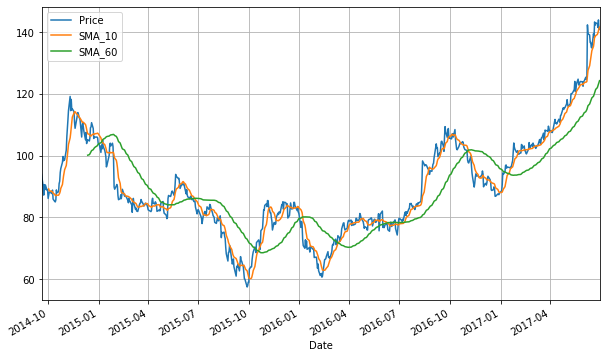

In [31]:
data[['Price','SMA_10','SMA_60']].plot(grid = True, figsize = (10,6))
plt.show()

### 而后我们要算一个distance

#### 就是我们要把短期均线和长期均线的距离算出来，因为我们不再是一旦看到金叉就做多，一旦看到死叉就做空，而是要看到短期均线超过超期均线一定距离并且还在上升阶段的时候，我们才做多。反之，如果长期均线超过短期均线一定距离并且短期均线还在下跌的时候我们才做空

In [33]:
data['10-60'] = data['SMA_10'] - data['SMA_60']
print(data['10-60'].tail())

Date
2017-06-26    17.243666
2017-06-27    17.174999
2017-06-28    17.305332
2017-06-29    17.323498
2017-06-30    17.368832
Name: 10-60, dtype: float64


### 这个时候我们可以设置一个阈值

In [34]:
SD = 3  #也就是说，只有当短期均线超过长期均线10点的时候，我们再开仓做多。
#如果是下跌的情况，那么超期均线超过短期均线10点的时候，我们再做空
#而如果在中间地带，那么就是标记0，那么我们就是空仓
data['regime'] = np.where(data['10-60'] > SD,1,0)  #这里的regime其实就是position其实就是signal
data['regime'] = np.where(data['10-60'] < -SD,-1,data['regime'])
print(data['regime'].value_counts())
print(data.tail())

 1    289
-1    210
 0    202
Name: regime, dtype: int64
                  High         Low        Open       Price    Volume  \
Date                                                                   
2017-06-26  145.360001  141.270004  144.029999  142.729996  17828100   
2017-06-27  144.380005  141.100006  143.899994  141.529999  17374800   
2017-06-28  144.369995  141.479996  142.649994  143.949997  17759800   
2017-06-29  143.559998  137.520004  143.160004  140.809998  24130300   
2017-06-30  142.380005  139.919998  141.029999  140.899994  12276700   

             Adj Close      SMA_10      SMA_60      10-60  regime  
Date                                                               
2017-06-26  142.729996  139.237000  121.993333  17.243666       1  
2017-06-27  141.529999  139.729999  122.555000  17.174999       1  
2017-06-28  143.949997  140.457999  123.152667  17.305332       1  
2017-06-29  140.809998  141.030998  123.707500  17.323498       1  
2017-06-30  140.899994  141.63

### 计算收益：①市场收益 ②策略收益

In [35]:
data['Market'] = np.log(data['Price']/data['Price'].shift(1))
data['strategy'] = data['regime'].shift(1) * data['Market']   #往前移一个日期，然后乘以市场收益，如果不往前移动那么就是未来函数
data

,High,Low,Open,Price,Volume,Adj Close,SMA_10,SMA_60,10-60,regime,Market,strategy
Date,,,,,,,,,,,,
2014-09-19,99.699997,89.949997,92.699997,93.889999,271879400,93.889999,NaN,NaN,NaN,0,NaN,NaN
2014-09-22,92.949997,89.500000,92.699997,89.889999,66657800,89.889999,NaN,NaN,NaN,0,-0.043537,-0.000000
2014-09-23,90.480003,86.620003,88.940002,87.169998,39009800,87.169998,NaN,NaN,NaN,0,-0.030726,-0.000000
2014-09-24,90.570000,87.220001,88.470001,90.570000,32088000,90.570000,NaN,NaN,NaN,0,0.038263,0.000000
2014-09-25,91.500000,88.500000,91.089996,88.919998,28598000,88.919998,NaN,NaN,NaN,0,-0.018386,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-26,145.360001,141.270004,144.029999,142.729996,17828100,142.729996,139.237000,121.993333,17.243666,1,-0.001960,-0.001960
2017-06-27,144.380005,141.100006,143.899994,141.529999,17374800,141.529999,139.729999,122.555000,17.174999,1,-0.008443,-0.008443
2017-06-28,144.369995,141.479996,142.649994,143.949997,17759800,143.949997,140.457999,123.152667,17.305332,1,0.016954,0.016954


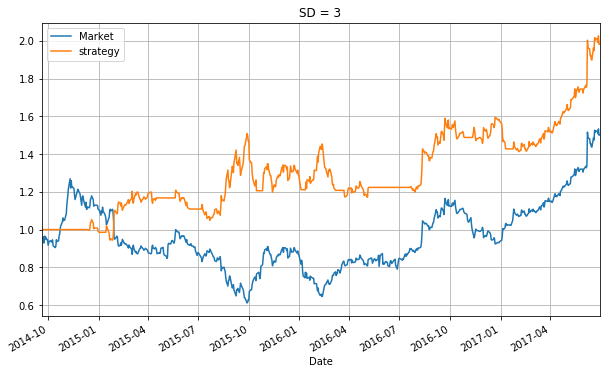

In [36]:
data[['Market','strategy']].cumsum().apply(np.exp).plot(title ='SD = 3', grid = True, figsize = (10,6))
plt.show()   #其实我们可以看出，我们这里是strategy是没有跑赢大盘的。比较平的地方或者说没有波动的地方其实就是我们空仓的地方，就是regime =0的时候。
#这种方法其实对于我们SD的选择要求还是很高的。如果改成SD = 5，那么跑出来的结果是可以跑赢大盘的，如果改成SD= 3那么效果会更好